In [3]:
import pandas as pd
trades = pd.read_csv('/historical_data.csv', low_memory=False)
sentiment = pd.read_csv('/fear_greed_index.csv')
trades.head(), sentiment.head()

(                                      Account  Coin  Execution Price  \
 0  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9769   
 1  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9800   
 2  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9855   
 3  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9874   
 4  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9894   
 
    Size Tokens  Size USD Side     Timestamp IST  Start Position Direction  \
 0       986.87   7872.16  BUY  02-12-2024 22:50        0.000000       Buy   
 1        16.00    127.68  BUY  02-12-2024 22:50      986.524596       Buy   
 2       144.09   1150.63  BUY  02-12-2024 22:50     1002.518996       Buy   
 3       142.98   1142.04  BUY  02-12-2024 22:50     1146.558564       Buy   
 4         8.73     69.75  BUY  02-12-2024 22:50     1289.488521       Buy   
 
    Closed PnL                                   Transaction Hash  \
 0         0.0  0xec0

In [4]:
trades.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37109 entries, 0 to 37108
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Account           37109 non-null  object 
 1   Coin              37109 non-null  object 
 2   Execution Price   37109 non-null  float64
 3   Size Tokens       37109 non-null  float64
 4   Size USD          37109 non-null  float64
 5   Side              37109 non-null  object 
 6   Timestamp IST     37109 non-null  object 
 7   Start Position    37109 non-null  float64
 8   Direction         37109 non-null  object 
 9   Closed PnL        37109 non-null  float64
 10  Transaction Hash  37109 non-null  object 
 11  Order ID          37108 non-null  float64
 12  Crossed           37108 non-null  object 
 13  Fee               37108 non-null  float64
 14  Trade ID          37108 non-null  float64
 15  Timestamp         37108 non-null  float64
dtypes: float64(9), object(7)
memory usage: 4

In [6]:
trades['Timestamp IST']=pd.to_datetime(
    trades['Timestamp IST'],
    format='%d-%m-%Y %H:%M'
)

In [8]:
trades[['Timestamp IST']].head()
trades.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37109 entries, 0 to 37108
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Account           37109 non-null  object        
 1   Coin              37109 non-null  object        
 2   Execution Price   37109 non-null  float64       
 3   Size Tokens       37109 non-null  float64       
 4   Size USD          37109 non-null  float64       
 5   Side              37109 non-null  object        
 6   Timestamp IST     37109 non-null  datetime64[ns]
 7   Start Position    37109 non-null  float64       
 8   Direction         37109 non-null  object        
 9   Closed PnL        37109 non-null  float64       
 10  Transaction Hash  37109 non-null  object        
 11  Order ID          37108 non-null  float64       
 12  Crossed           37108 non-null  object        
 13  Fee               37108 non-null  float64       
 14  Trade ID          3710

In [9]:
trades = trades.dropna(subset=['Timestamp IST'])

In [10]:
trades['Closed PnL']=pd.to_numeric(
    trades['Closed PnL'],
    errors='coerce'
).fillna(0)

In [13]:
numeric_cols=[
    'Execution Price',
    'Size Tokens',
    'Size USD',
    'Fee',
    'Start Position'
]

for col in numeric_cols:
   trades[col]=pd.to_numeric(trades[col], errors='coerce')

In [14]:
trades['Date']=trades['Timestamp IST'].dt.date

In [18]:
sentiment['data'] = pd.to_datetime(sentiment['date'])

In [19]:
sentiment.rename(columns={
    'data': 'Date',
    'classification':'Market Sentiment',
    'value':'Sentiment Score'
    }, inplace=True)

In [21]:
sentiment['Market Sentiment']=sentiment['Market Sentiment'].astype(str)
sentiment['Sentimate  Score']=pd.to_numeric(sentiment['Sentiment Score'])

In [22]:
trades.info()
sentiment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37109 entries, 0 to 37108
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Account           37109 non-null  object        
 1   Coin              37109 non-null  object        
 2   Execution Price   37109 non-null  float64       
 3   Size Tokens       37109 non-null  float64       
 4   Size USD          37109 non-null  float64       
 5   Side              37109 non-null  object        
 6   Timestamp IST     37109 non-null  datetime64[ns]
 7   Start Position    37109 non-null  float64       
 8   Direction         37109 non-null  object        
 9   Closed PnL        37109 non-null  float64       
 10  Transaction Hash  37109 non-null  object        
 11  Order ID          37108 non-null  float64       
 12  Crossed           37108 non-null  object        
 13  Fee               37108 non-null  float64       
 14  Trade ID          3710

In [23]:
trades['Trade Value USD'] = trades['Execution Price'] * trades['Size Tokens']


In [29]:
trades['IS Profitable'] = trades['Closed PnL'] > 0

In [31]:
trades['Buy Trade']=trades['Side']== 'Buy'

In [36]:
daily_trades = trades.groupby('Date').agg(
    Total_PnL=('Closed PnL', 'sum'),
    Total_Volume_USD=('Trade Value USD', 'sum'),
    Avg_Trade_Size_USD=('Trade Value USD', 'mean'),
    Avg_Start_Position=('Start Position', 'mean'),
    Win_Rate=('Is Profitable', 'mean'),
    Trade_Count=('Closed PnL', 'count')
).reset_index()
daily_trades.head()

,Date,Total_PnL,Total_Volume_USD,Avg_Trade_Size_USD,Avg_Start_Position,Win_Rate,Trade_Count
0,2024-01-19,-0.204000,1526.81084,169.645649,-0.008956,0.111111,9
1,2024-01-22,1166.248788,54022.57542,1125.470321,2379.839588,0.291667,48
2,2024-01-26,90.200000,9255.80000,4627.900000,10000.000000,0.500000,2
3,2024-01-29,1.715440,2068.86248,1034.431240,2092.000000,0.500000,2
4,2024-02-14,3639.303169,218138.72522,2478.849150,2795.527273,0.897727,88


In [39]:
daily_trades['Date'] = pd.to_datetime(daily_trades['Date'])


In [40]:
sentiment.head()


,timestamp,Sentiment Score,Market Sentiment,date,Date,Sentimate Score
0,1517463000,30,Fear,2018-02-01,2018-02-01,30
1,1517549400,15,Extreme Fear,2018-02-02,2018-02-02,15
2,1517635800,40,Fear,2018-02-03,2018-02-03,40
3,1517722200,24,Extreme Fear,2018-02-04,2018-02-04,24
4,1517808600,11,Extreme Fear,2018-02-05,2018-02-05,11


In [41]:
final_df = pd.merge(
    daily_trades,
    sentiment[['Date', 'Market Sentiment', 'Sentiment Score']],
    on='Date',
    how='inner'
)


In [42]:
final_df.head()
final_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 384 entries, 0 to 383
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Date                384 non-null    datetime64[ns]
 1   Total_PnL           384 non-null    float64       
 2   Total_Volume_USD    384 non-null    float64       
 3   Avg_Trade_Size_USD  384 non-null    float64       
 4   Avg_Start_Position  384 non-null    float64       
 5   Win_Rate            384 non-null    float64       
 6   Trade_Count         384 non-null    int64         
 7   Market Sentiment    384 non-null    object        
 8   Sentiment Score     384 non-null    int64         
dtypes: datetime64[ns](1), float64(5), int64(2), object(1)
memory usage: 27.1+ KB


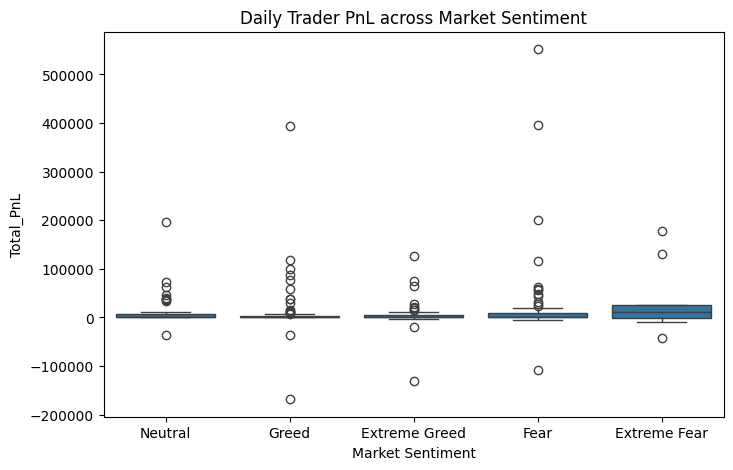

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8,5))
sns.boxplot(
    x='Market Sentiment',
    y='Total_PnL',
    data=final_df
)
plt.title('Daily Trader PnL across Market Sentiment')
plt.show()


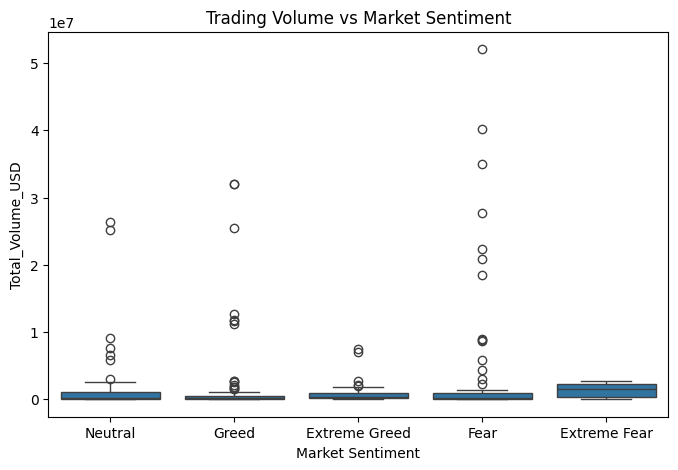

In [47]:
plt.figure(figsize=(8,5))
sns.boxplot(
    x='Market Sentiment',
    y='Total_Volume_USD',
    data=final_df
)
plt.title('Trading Volume vs Market Sentiment')
plt.show()


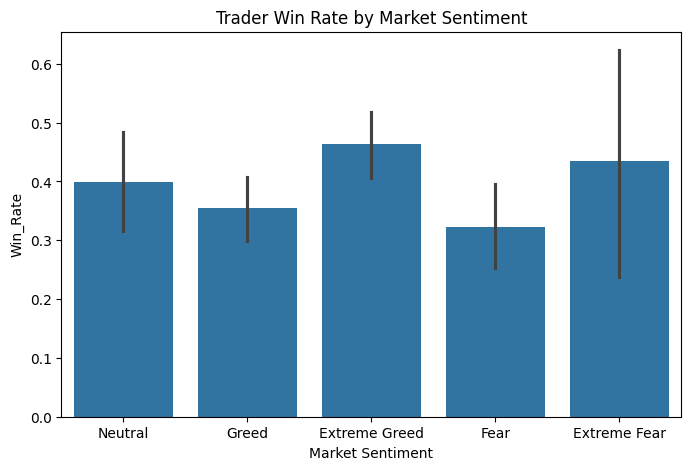

In [49]:
plt.figure(figsize=(8,5))
sns.barplot(
    x='Market Sentiment',
    y='Win_Rate',
    data=final_df
)
plt.title('Trader Win Rate by Market Sentiment')
plt.show()


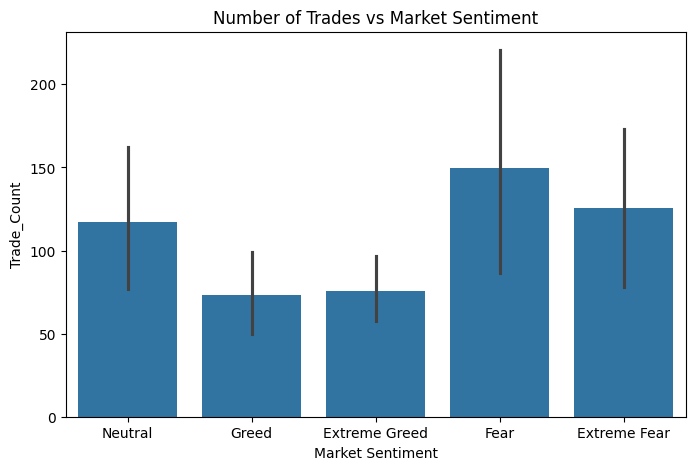

In [52]:
plt.figure(figsize=(8,5))
sns.barplot(
    x='Market Sentiment',
    y='Trade_Count',
    data=final_df
)
plt.title('Number of Trades vs Market Sentiment')
plt.show()


In [53]:
final_df[['Sentiment Score','Total_PnL','Win_Rate']].corr()


,Sentiment Score,Total_PnL,Win_Rate
Sentiment Score,1.000000,-0.142657,0.093315
Total_PnL,-0.142657,1.000000,0.130042
Win_Rate,0.093315,0.130042,1.000000
